In [7]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch    
import torch.nn as nn
import torch.nn.functional as F

#set figure size
sns.set(rc={'figure.figsize':(10,5)})
#darkgrid, whitegrid, dark, white, and ticks
sns.set_style("darkgrid")

In [8]:
#1d signal
x = torch.linspace(0, 10, 100)
y_sin = torch.sin(x)
y_cos = torch.cos(x)
#make two columns
y = torch.stack((y_sin, y_cos), dim=1)
#add batch dimension
y = y.unsqueeze(0)
#swap 1st and 2nd dimensions
y = y.permute(0, 2, 1)
print(y.shape)

torch.Size([1, 2, 100])


### So, 1d conv in Pytorch takes input as (batch_size, channels, length) and outputs as (batch_size, channels, length). So, we used permute to change the order of the dimensions.

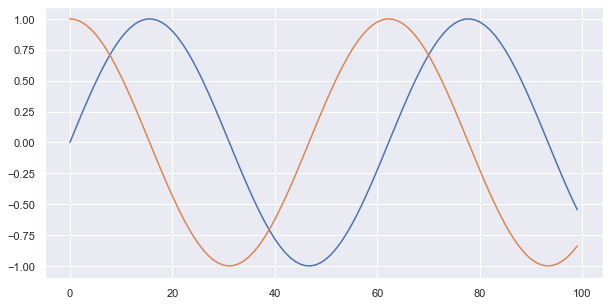

In [9]:
#plot the signal
plt.plot(y[0].permute(1, 0));

In [10]:
#1d convolution
conv = nn.Conv1d(in_channels=2, out_channels=4, kernel_size=3, stride=1, padding='valid')

In [11]:
y_hat = conv(y)

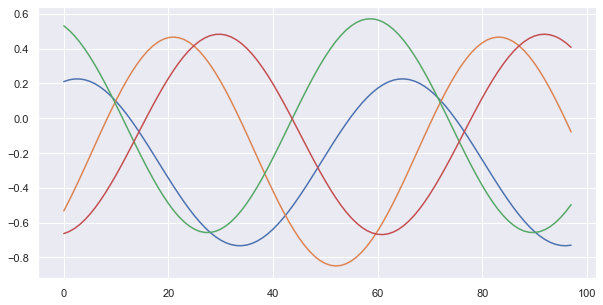

In [13]:
plt.plot(y_hat[0].permute(1, 0).detach().numpy())
plt.show()

### So, what happens is, as the output channel is 4, conv1d creates a weight of 4 different kernel matrix. As the kernel size is 3, and in channel is 2, so the kernel matrix is of size 4x2x3. These 2x3 kernels stride along the length of the input and performs convolutions. 

In [15]:
conv.weight.shape, conv.bias.shape

(torch.Size([4, 2, 3]), torch.Size([4]))

In [16]:
#see the weights
print(conv.weight), print(conv.bias)

Parameter containing:
tensor([[[ 0.0820,  0.2336, -0.2126],
         [ 0.3805,  0.3598, -0.2609]],

        [[-0.0164,  0.3329,  0.1769],
         [-0.0221, -0.0538, -0.3417]],

        [[-0.1038,  0.1824, -0.2672],
         [ 0.3637,  0.1403,  0.1078]],

        [[ 0.2729,  0.0274, -0.3223],
         [ 0.1156, -0.2821, -0.3500]]], requires_grad=True)
Parameter containing:
tensor([-0.2538, -0.1918, -0.0433, -0.0935], requires_grad=True)


(None, None)

In [17]:
y.permute(0, 2, 1)[0][:5, :], y_hat.permute(0, 2, 1)[0][:5, :]

(tensor([[0.0000, 1.0000],
         [0.1008, 0.9949],
         [0.2006, 0.9797],
         [0.2984, 0.9544],
         [0.3931, 0.9195]]),
 tensor([[ 0.2099, -0.5330,  0.5304, -0.6633],
         [ 0.2198, -0.4746,  0.5053, -0.6520],
         [ 0.2250, -0.4133,  0.4746, -0.6351],
         [ 0.2252, -0.3497,  0.4386, -0.6126],
         [ 0.2206, -0.2845,  0.3977, -0.5848]], grad_fn=<SliceBackward0>))

In [18]:
#one manual convolution
torch.dot(conv.weight[0][0], y[0][0][:3]) + torch.dot(conv.weight[0][1], y[0][1][:3]) + conv.bias[0]

tensor(0.2099, grad_fn=<AddBackward0>)

### So, every kernel combines all the channels with convolution and then adds the bias, and make one output channel. There are 4 kernels, so there are 4 output channels. Weight of the kernel is learned by the model, and that dictates which channel contributes the most to one specific output channel.